## Introduction

*I will perform data cleansing, wrangling and analyzing on 3 datasets that contains data about YouTube Trending videos in 3 different parts of the world - USA, Canada and Great Britain.*

##### Questions that the business team wants to be answered:

In [32]:
# 1) Are there any clear differences between trending videos depending on the region?
# 2) Which video remained the most on the trending videos list?
# 3) Which video category has the largest number of trending videos? Does the category give
# any advantage in order to become trending?
# 4) How are views, likes and dislikes, title length, and other attributes correlated with (relate
# to) each other? Are they connected in any way?
# 5) If Nordigen would upload a video, what words in the title (or description) or tags would
# you recommend to use? (In hopes to make the video trending)

##### Importing required libraries.

In [3]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

##### Reading dataset "US videos".

In [12]:
usa = pd.read_csv('USvideos.csv', sep=';')
usa.head()

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,",'shantell martin'",804.0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,",'last week tonight trump presidency','last we...",806.0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,",'racist superman','rudy','mancuso','king','ba...",805.0
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,",'rhett and link','gmm','good mythical morning...",806.0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,",'ryan','higa','higatv','nigahiga','i dare you...",806.0


##### Shape of our Dataset

In [13]:
usa.shape

(46978, 17)

In [30]:
# Dataset consist of 46 978 rows and 17 columns.

##### The names of all columns in this dataset

In [14]:
usa.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'country', 'tags', 'category_id'],
      dtype='object')

##### The number of unique videos in the USA dataset

In [16]:
usa['video_id'].unique().shape[0]

6828

##### A trending video with the minimal number of views

In [22]:
usa[usa['views'] == usa['views'].min()].transpose()

,16285
video_id,y6KYFcta4SE
trending_date,18.26.01
title,"1 dead, others injured after Ky. school shooting"
channel_title,Newsy
publish_time,2018-01-23T15:30:01.000Z
views,549
likes,9
dislikes,0
comment_count,5
thumbnail_link,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg


In [35]:
# Video with the least views was a video called "1 dead, others injured after Ky. school shooting"
# with only 549 views.

##### A trending video with the maximum number of views

In [24]:
usa[usa['views'] == usa['views'].max()].transpose()

,44424
video_id,VYOjWnS4cMY
trending_date,18.02.06
title,Childish Gambino - This Is America (Official V...
channel_title,ChildishGambinoVEVO
publish_time,2018-05-06T04:00:07.000Z
views,2.25212e+08
likes,5.02345e+06
dislikes,343541
comment_count,517232
thumbnail_link,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg


In [27]:
# This view dont give us precise number of views for the most popular video, so we gan found
# found it other way.

In [28]:
usa['views'].max()

225211923.0

In [26]:
# Video with the most views was a video called "Childish Gambino - This Is America (Official V..."
# sitting with more than 225 million views.

##### Check data types of columns

In [20]:
usa.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
publish_time               object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
country                    object
tags                       object
category_id               float64
dtype: object

##### Check for missing data

In [34]:
for i in usa.columns:
    null_rate = usa[i].isna().sum()/len(usa)*100
    if null_rate >= 0:
        print("Column '{}' null rate: {}&".format(i,round(null_rate,2)))

Column 'video_id' null rate: 0.0&
Column 'trending_date' null rate: 10.48&
Column 'title' null rate: 10.48&
Column 'channel_title' null rate: 10.85&
Column 'publish_time' null rate: 12.93&
Column 'views' null rate: 12.93&
Column 'likes' null rate: 12.93&
Column 'dislikes' null rate: 12.93&
Column 'comment_count' null rate: 12.93&
Column 'thumbnail_link' null rate: 12.93&
Column 'comments_disabled' null rate: 12.93&
Column 'ratings_disabled' null rate: 12.93&
Column 'video_error_or_removed' null rate: 12.93&
Column 'description' null rate: 14.15&
Column 'country' null rate: 15.39&
Column 'tags' null rate: 15.39&
Column 'category_id' null rate: 19.36&


In [36]:
categories = pd.read_csv('categories.csv', sep=';')
categories.head()

,category_id,category_id_lvl_0,category_id_lvl_1,category_id_lvl_2,category_title_lvl_0,category_title_lvl_1,category_title_lvl_2
0,101,100,101.0,NaN,Politics & Nonprofits,Nonprofits & Activism,NaN
1,102,100,102.0,NaN,Politics & Nonprofits,News & Politics,NaN
2,201,200,201.0,NaN,Cinema,Film & Animation,NaN
3,202,200,202.0,NaN,Cinema,Trailers,NaN
4,203,200,203.0,NaN,Cinema,Full Movies,NaN


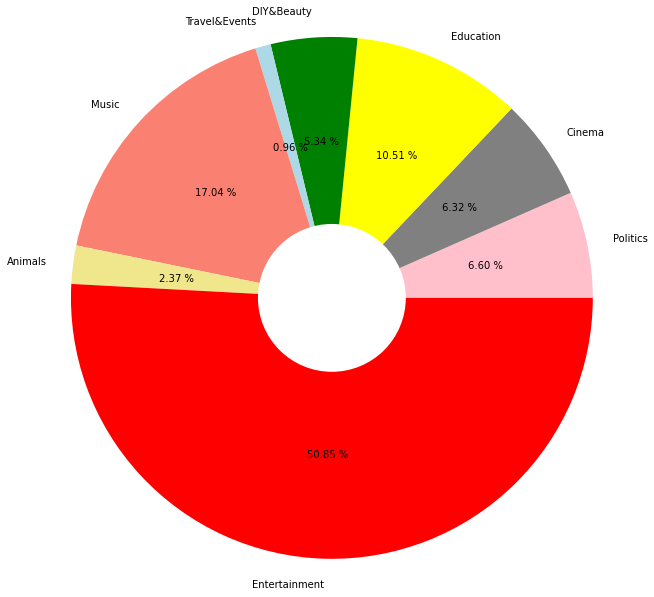

In [84]:
politics = usa.loc[(usa.category_id >= 100) & (usa.category_id <= 102)].count()[0]
cinema = usa.loc[(usa.category_id >= 200) & (usa.category_id <= 204)].count()[0]
education = usa.loc[(usa.category_id >= 300) & (usa.category_id <= 302)].count()[0]
diy_and_beauty = usa.loc[(usa.category_id >= 400) & (usa.category_id <= 497)].count()[0]
travel_and_events = usa.loc[(usa.category_id >= 500) & (usa.category_id <= 551)].count()[0]
music = usa.loc[(usa.category_id >= 600) & (usa.category_id <= 600)].count()[0]
animals = usa.loc[(usa.category_id >= 700) & (usa.category_id <= 700)].count()[0]
entertainment = usa.loc[(usa.category_id >= 800) & (usa.category_id <= 806)].count()[0]

labels = ['Politics', 'Cinema', 'Education', 'DIY&Beauty', 'Travel&Events', 'Music', 'Animals', 'Entertainment']
colors = ['pink', 'grey', 'yellow', 'green', 'lightblue', 'salmon', 'khaki', 'red']

plt.pie([politics, cinema, education, diy_and_beauty, travel_and_events, music, animals, entertainment], radius=3, labels = labels, colors = colors, autopct='%.2f %%')

centre_circle = plt.Circle((0,0),0.85,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#plt.title('Distribution')
plt.show()

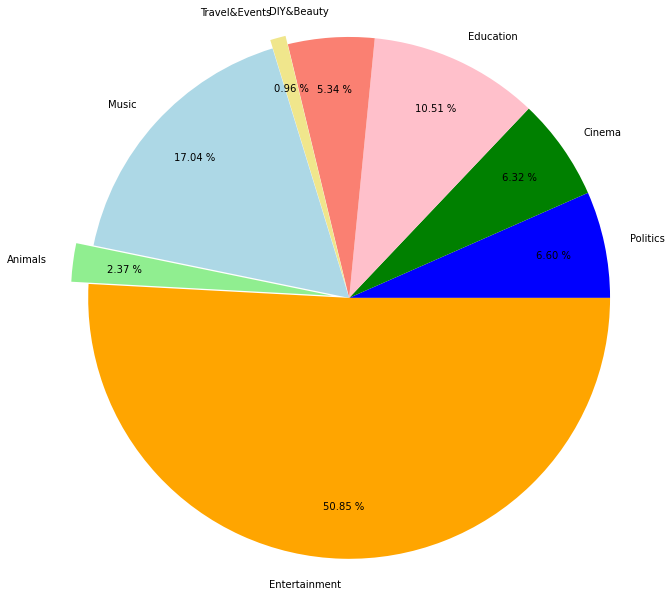

In [77]:
politics = usa.loc[(usa.category_id >= 100) & (usa.category_id <= 102)].count()[0]
cinema = usa.loc[(usa.category_id >= 200) & (usa.category_id <= 204)].count()[0]
education = usa.loc[(usa.category_id >= 300) & (usa.category_id <= 302)].count()[0]
diy_and_beauty = usa.loc[(usa.category_id >= 400) & (usa.category_id <= 497)].count()[0]
travel_and_events = usa.loc[(usa.category_id >= 500) & (usa.category_id <= 551)].count()[0]
music = usa.loc[(usa.category_id >= 600) & (usa.category_id <= 600)].count()[0]
animals = usa.loc[(usa.category_id >= 700) & (usa.category_id <= 700)].count()[0]
entertainment = usa.loc[(usa.category_id >= 800) & (usa.category_id <= 806)].count()[0]

categories = [politics, cinema, education, diy_and_beauty, travel_and_events, music, animals, entertainment]
explode = [0,0,0,0,.1,0,.2,0]
colors = ['blue', 'green', 'pink', 'salmon', 'khaki', 'lightblue', 'lightgreen', 'orange']
labels = ['Politics', 'Cinema', 'Education', 'DIY&Beauty', 'Travel&Events', 'Music', 'Animals', 'Entertainment']

#plt.title('Distribution of videos by Categories!')

plt.pie(categories, labels=labels, radius=3, colors=colors, autopct='%.2f %%', pctdistance=0.8, explode=explode)
plt.show()